# Does Fandango Still Inflate Movie Ratings?

In October 2015, a data journalist by the name of Walt Hickey disvcovered that movie ratings from Fandango were rather biased and dishonest: https://fivethirtyeight.com/features/fandango-movies-ratings/

By the end of this project, we aim to see if Fandango's updated ratings system still showcases the fallacies as before, or if they have updated their system after Hickey's discoveries.

## Data Exploration

To find any differences between Fandango's past and current ratings system, we will work with two different datasets. One contains data prior to Hcikey's analysis, and the other contains data from after. Let's do some initial analysis to gain an understanding of the datasets.

In [1]:
import pandas as pd

before = pd.read_csv("C:\\Users\\pc\\Desktop\\Dataquest\\Investigating Fandango Movie Ratings\\fandango_score_comparison.csv")
after = pd.read_csv("C:\\Users\\pc\\Desktop\\Dataquest\\Investigating Fandango Movie Ratings\\movie_ratings_16_17.csv")

before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [5]:
print(after.shape)
after.head()

(214, 15)


,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


We are going to isolate the Fandango columns for our investigations from each of the datasets.

In [9]:
fandango_before = before[["FILM","Fandango_Stars","Fandango_Ratingvalue","Fandango_votes","Fandango_Difference"]].copy()
fandango_after = after[["movie","year","fandango"]].copy()

In [10]:
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [11]:
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. The population of interest for our analysis is made of all the movie ratings stored on Fandango's website, regardless of the releasing year.

Because we want to find out whether the parameters of this population changed after Hickey's analysis, we're interested in sampling the population at two different periods in time — previous and after Hickey's analysis — so we can compare the two states.

The data we're working with was sampled at the moments we want: one sample was taken previous to the analysis, and the other after the analysis. We want to describe the population, so we need to make sure that the samples are representative, otherwise we should expect a large sampling error and, ultimately, wrong conclusions.

From Hickey's article and from the README.md of the data set's repository, we can see that he used the following sampling criteria:

* The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
* The movie must have had tickets on sale in 2015.

The sampling was clearly not random because not every movie had the same chance to be included in the sample — some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015). It's questionable whether this sample is representative of the entire population we're interested to describe. It seems more likely that it isn't, mostly because this sample is subject to temporal trends — e.g. movies in 2015 might have been outstandingly good or bad compared to other years.

The sampling conditions for our other sample were (as it can be read in the README.md of the data set's repository):

* The movie must have been released in 2016 or later.
* The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data).

This second sample is also subject to temporal trends and it's unlikely to be representative of our population of interest.

Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions. Their sampling method is called purposive sampling (or judgmental/selective/subjective sampling). While these samples were good enough for their research, they don't seem too useful for us.

## Project Goal Adjustment

At this point, we can either collect new data or change our the goal of our analysis. We choose the latter and place some limitations on our initial goal.

Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

## Isolate Samples

With this new research goal, we have two populations of interest:

* All Fandango's ratings for popular movies released in 2015.
* All Fandango's ratings for popular movies released in 2016.

We need to be clear about what counts as popular movies. We'll use Hickey's benchmark of 30 fan ratings and count a movie as popular only if it has 30 fan ratings or more on Fandango's website.

Although one of the sampling criteria in our second sample is movie popularity, the sample doesn't provide information about the number of fan ratings. We should be skeptical once more and ask whether this sample is truly representative and contains popular movies (movies with over 30 fan ratings).

One quick way to check the representativity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more.

In [14]:
fandango_after.sample(10,random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Above we used a value of 1 as the random seed. This is good practice because it suggests that we weren't trying out various random seeds just to get a favorable sample.

As of April 2018, these are the fan ratings we found:

| Movie                      | Fan Ratings |
|----------------------------|-------------|
| Mechanic: Resurrection     | 2247        |
| Warcraft                   | 7271        |
| Max Steel                  | 493         |
| Me Before You              | 5263        |
| Fantastic Beasts           | 13400       |
| Cell                       | 17          |
| Genius                     | 127         |
| Sully                      | 11877       |
| A Hologram for the King    | 500         |
| Captain America: Civil War | 35057       |
    

According to our findings, 90% of the movies contain 30 or more fan ratings which is more than enough for us to move on with some more confidence.

Let's make sure that the other dataset only contains data with at least 30 fan ratings, as stated in its original file.

In [16]:
sum(fandango_before["Fandango_votes"] < 30)

0

As we explore the datasets, we can see that there are films that have been released in years other than 2015 and 2016. Let us go ahead and isolate these movies so that our data only contains films from these particular years.

First, let's go ahead and isolate the films with 2015. There seems to be no specific column for Year, but we should be able to extract it from the Film column.

In [17]:
fandango_before.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5


In [18]:
fandango_before["Year"] = fandango_before["FILM"].str[-5:-1]
fandango_before.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


In [20]:
fandango_before["Year"].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

As we see above, it seems like we have several movies from 2014 so let's go ahead and filter those out.

In [30]:
fandango_2015 = fandango_before[fandango_before["Year"] == "2015"].copy()
fandango_2015["Year"].value_counts()

2015    129
Name: Year, dtype: int64

Let's go ahead and try to isolate the other dataset as well.

In [31]:
fandango_after.head(2)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5


In [32]:
fandango_after["year"].value_counts()

2016    191
2017     23
Name: year, dtype: int64

Let's go ahead and isolate the 2016 year data.

In [33]:
fandango_2016 = fandango_after[fandango_after["year"] == 2016].copy()
fandango_2016["year"].value_counts()

2016    191
Name: year, dtype: int64

## Comparing Distribution Shapes for 2015 and 2016

Our aim is to figure out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. One way to go about is to analyze and compare the distributions of movie ratings for the two samples.

We'll start with comparing the shape of the two distributions using kernel density plots. We'll use the FiveThirtyEight style for the plots.

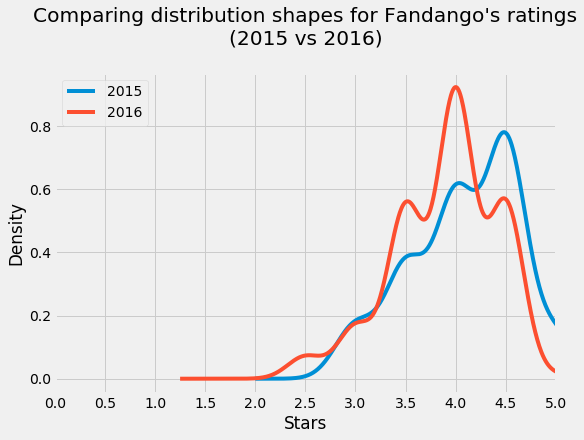

In [36]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

plt.style.use("fivethirtyeight")

fandango_2015["Fandango_Stars"].plot.kde(label = "2015", legend = True, figsize = (8,5.5))
fandango_2016["fandango"].plot.kde(label="2016",legend=True,figsize=(8,5.5))

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07)
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()

There are two things to note from our analysis:

* Both datasets are strongly skewed to the left
* The 2016 dataset does seem to be slightly shifted to the left in comparison to the 2015 distribution.

The 2016 line is extremely interesting to our analysis as it shows that since Hickey's discovery, it seems that Fandango has indded adjusted their rating system.

## Comparing Relative Frequencies

While the trend seems to be going well so far, we should try to analyze the details a bit more. Let's attempt to analye the frequency tables of the two distributions to delve a little deeper. Furthermore, since the datasets have a different number of movies, let's go ahead and normalize the tables and show percentages instead.

In [37]:
print("2015" + "\n" + ("-" * 10))

fandango_2015["Fandango_Stars"].value_counts(normalize=True).sort_index()*100

2015
----------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [38]:
print("2016" + "\n" + ("-" * 10))

fandango_2016["fandango"].value_counts(normalize=True).sort_index()*100

2016
----------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

It seems that in 2016, the percentage of higher ratings (4.5 & 5.0) went down significantly.Furthermore, it seems that the minimum rating is also lower in 2016, with there being a 2.5 star rating.

One interesting thing to note is that there was a greater percentage of movie ratings in the 3.5-4.0 range in comparison to 2015. This directly challenges the change of direction that we plotted in the KDE plots.

## Determining the Change's Direction

Let's go ahead and find a couple of summary metrics to get a better understanding of the direction of change. This includes the:

* Mean
* Median
* Mode

We will find these for both distributions and then use a bar graph to plot the values.

In [49]:
mean_2015 = fandango_2015["Fandango_Stars"].mean()
mean_2016 = fandango_2016["fandango"].mean()

median_2015 = fandango_2015["Fandango_Stars"].median()
median_2016 = fandango_2016["fandango"].median()

mode_2015 = fandango_2015["Fandango_Stars"].mode()[0]
mode_2016 = fandango_2016["fandango"].mode()[0]

summary = pd.DataFrame()
summary["2015"] = [mean_2015,median_2015,mode_2015]
summary["2016"] = [mean_2016,median_2016,mode_2016]
summary.index = ["Mean","Median","Mode"]
summary

,2015,2016
Mean,4.085271,3.887435
Median,4.000000,4.000000
Mode,4.500000,4.000000


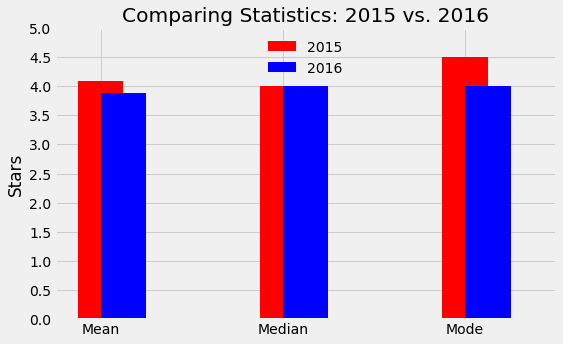

In [60]:
plt.style.use("fivethirtyeight")

summary["2015"].plot.bar(color = "red", label = "2015", align = "center", width = .25)
summary["2016"].plot.bar(color = "blue", label = "2016", align = "edge", width = .25,
                        rot = 0, figsize = (8,5))
plt.title("Comparing Statistics: 2015 vs. 2016")
plt.ylim(0,5,.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')

plt.show()

In 2016, the mean rating drops about 0.2 from 2015. The median seems to be the same, but the mode is also lower in 2016. With all this in mind, it does seem like the original direction of our initial KDE plot is confirmed and the movies released in 2016 are slightly lower than those released in 2015.